In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec
from matplotlib.markers import MarkerStyle
from matplotlib import ticker as mticker
from matplotlib.ticker import LogLocator, MultipleLocator
import glob
import re
from scipy.interpolate import griddata
from scipy.optimize import least_squares
from scipy.interpolate import interp1d 
from scipy.interpolate import interp2d 
import sys
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as path_effects
from matplotlib.colors import LogNorm
from scipy.interpolate import splrep, splev
from numpy import linalg as LA
import csv
import os
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.patches as patches

def exit(): 
    raise StopExecution

def colors(alpha):
    colors = [
    (0.0, 0.45, 0.7, alpha),   # Strong Blue
    (0.9, 0.6, 0.0, alpha),    # Bright Orange
    (0.0, 0.6, 0.5, alpha),    # Teal
    (0.8, 0.4, 0.0, alpha),    # Deep Orange
    (0.6, 0.3, 0.6, alpha),    # Purple
    (0.2, 0.8, 0.2, alpha),    # Bright Green
    (0.9, 0.9, 0.3, alpha),    # Yellow-Gold
    (0.35, 0.7, 0.9, alpha),   # Sky Blue
    (0.7, 0.2, 0.1, alpha),    # Reddish Brown
    (0.7, 0.6, 0.1, alpha)     # Olive Green
    ]
    return colors





In [23]:

pt1d= '../results/micelles/LHBC/dw_*/encapsulation/SCF_runs_1d/phi_runs/all_details.dat'
pt2d= '../results/micelles/LHBC/dw_*/encapsulation/SCF_runs_2d/phi_runs/all_details.dat'
pt3d= '../results/micelles/LHBC/dw_*/encapsulation/SCF_runs_3d/phi_runs/all_details.dat'


files1d = np.array(glob.glob(pt1d))
files2d = np.array(glob.glob(pt2d))
files3d = np.array(glob.glob(pt3d))


dws1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d])
dws2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d])
dws3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d])



pt1d_ldbc= '../results/micelles/LDBC/gen*/encapsulation/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_ldbc= '../results/micelles/LDBC/gen*/encapsulation/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_ldbc= '../results/micelles/LDBC/gen*/encapsulation/SCF_runs_3d/phi_runs/all_details.dat'


files1d_ldbc = np.array(glob.glob(pt1d_ldbc))
files2d_ldbc = np.array(glob.glob(pt2d_ldbc))
files3d_ldbc = np.array(glob.glob(pt3d_ldbc))


gen1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d_ldbc])
gen2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d_ldbc])
gen3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d_ldbc])


gen_num=len(np.unique(gen3d))


pt1d_linear= '../results/micelles/linear/encapsulation/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_linear= '../results/micelles/linear/encapsulation/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_linear= '../results/micelles/linear/encapsulation/SCF_runs_3d/phi_runs/all_details.dat'


files1d_linear = np.array(glob.glob(pt1d_linear))
files2d_linear = np.array(glob.glob(pt2d_linear))
files3d_linear = np.array(glob.glob(pt3d_linear))


rhos_lhbc_pt='../results/micelles/LHBC/dw_*/enc*/SCF_runs_*/p*/c*/ph*/analysis/rhos.dat'
files_rhos_lhbc = np.array(glob.glob(rhos_lhbc_pt))
dws_rhos=np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files_rhos_lhbc])

rhos_ldbc_pt='../results/micelles/LDBC/gen*/enc*/SCF_runs_*/p*/c*/ph*/analysis/rhos.dat'
files_rhos_ldbc = np.array(glob.glob(rhos_ldbc_pt))
gen_rhos=np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files_rhos_ldbc])

rhos_linear_pt='../results/micelles/linear/enc*/SCF_runs_*/p*/c*/ph*/analysis/rhos.dat'
files_rhos_linear = np.array(glob.glob(rhos_linear_pt))



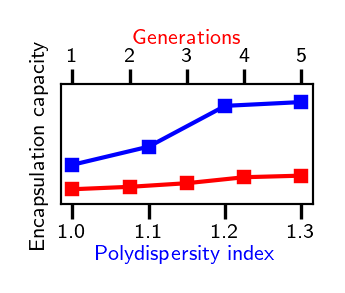

In [27]:
def poly_fit(x,a,b,c,d):
    y = a*x+b*x**2+c*x**3+d*x**4
    return y

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions
 

def unionarrays(arrays):
    result = arrays[0]  # Start with the first array
    for array in arrays[1:]:
        result = np.union1d(result, array)  # Union of the current result with the next array
    return result


#FIGURE PARAMETERS
width = 1.
#height = width/1.4
height = 0.8
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=5)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.rc('axes', labelsize=5)
plt.rc('legend', fontsize=5,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
plt.rc('xtick.major', pad=1)  # Adjust horizontal tick label padding
plt.rc('ytick.major', pad=1)  # Adjust vertical tick label padding
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
# gs1=GridSpec(2,1,  left=0.15, bottom=0.14, right=.95, top=.96 )
# ax0=plt.subplot(gs1[0,0])
# ax1=plt.subplot(gs1[1,0])

gs1=GridSpec(1,1, left=0.11, bottom=0.25, right=.95, top=.75,wspace=0.8 )
ax0=plt.subplot(gs1[0,0])

pl_cl=colors(0.5)
cl=colors(1)




phibarss=[]
types=[] # 0 =vesicle 1=cylinder 2=sphere


phihomo=0.00001 #Homopolymer phibar used

mult=1e3
mult_phi=1e3

#LHBC
symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
dw_chosen=[1,1.1,1.2,1.3]

for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    inter_pts_means=[]
    inter_pts_stds=[]
    inter_full=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d
            dws=dws1d
        if p==1:
            files=files2d
            dws=dws2d
            
        if p==2:
            files=files3d
            dws=dws3d
        
        edif_full=[]  
        phis_full=[]


        fil=files[(dws==dw_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        phibar=dat[:,16]
        edif=dat[:,17]
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]


        inter_pt=inverse_interp(phibar[stat==0],edif[stat==0],0)[-1]

        inter_full.append(inter_pt)

        
        edif[stat!=0]=np.nan #simulation that didnt converge coreectly are not accounted in the mean and std calc
        phibar[stat!=0]=np.nan
        edif_full.append(edif)
        phis_full.append(phibar)
        

        lab="PDI = "+str(dw_chosen[i])
        
#         if p==0:
#             ax0.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i],label=lab)
#         else:
#             ax0.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i])   


#     print(np.array(inter_full))
    pt=np.argmin(np.array(inter_full))
    
    phibarss.append(inter_full[pt]-phihomo)
    types.append(pt)

        
    x=[inter_full[pt]]
    y=0
    
#     ax0.scatter((np.array(x)-phihomo)*mult_phi,y,marker=symbols[pt],c=pl_cl[i],s=10.0)  



#Linear

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d


inter_full=[]

for p in range(0,3): #looping over geometries
    if p==0:
        files=files1d_linear
    if p==1:
        files=files2d_linear
    if p==2:
        files=files3d_linear


    edif_full=[]  
    phis_full=[]


    fil=files[0]
    dat=np.loadtxt(fil,skiprows=0)
    phibar=dat[:,16]
    edif=dat[:,17]
    stat=dat[:,0]

    phibar=phibar[abs(edif)>=1e-5]
    stat=stat[abs(edif)>=1e-5]
    edif=edif[abs(edif)>=1e-5]

    phibar=phibar[stat==0]
    edif=edif[stat==0]

#     print(inverse_interp(phibar,edif,0))
    inter_pt=inverse_interp(phibar,edif,0)[-1]
    inter_full.append(inter_pt)


#     if p==0:
#         ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[0],label='Gen. = 0')

#     else:
#         ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[0])


pt=np.argmin(np.array(inter_full))
x=[inter_full[pt]]
y=0
# ax1.scatter(np.array(x)*mult_phi,y,marker=symbols[pt],c=pl_cl[len(gen_chosen)],s=10.0)
phibarss.append(inter_full[pt]-phihomo)
types.append(pt)

# ax1.scatter((np.array(x)-phihomo)*mult_phi,y,marker=symbols[pt],c=pl_cl[0],s=10.0)
    
    

#LDBC

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
gen_chosen=[1,2,3,4,5]

for i in range(0,len(gen_chosen)):  #looping over PDIs
  

    inter_full=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d_ldbc
            gen=gen1d
        if p==1:
            files=files2d_ldbc
            gen=gen2d
        if p==2:
            files=files3d_ldbc
            gen=gen3d
          
        
        edif_full=[]  
        phis_full=[]
        
       
        fil=files[(gen==gen_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        phibar=dat[:,16]
        edif=dat[:,17]
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]

        phibar=phibar[stat==0]
        edif=edif[stat==0]
        inter_pt=inverse_interp(phibar,edif,0)[-1]
        inter_full.append(inter_pt)

        
#         if p==0:
#             ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i+1],label='Gen. = '+str(gen_chosen[i]))

#         else:
#             ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i+1])
 

    pt=np.argmin(np.array(inter_full))
    x=[inter_full[pt]]
    y=0
#     ax1.scatter((np.array(x)-phihomo)*mult_phi,y,marker=symbols[pt],c=pl_cl[i+1],s=10.0)
    phibarss.append(inter_full[pt]-phihomo)
    types.append(pt)
    

    
    
    
    
    
yphimin=0.9
yphimax=2.2
yphi=yphimax-yphimin

yrhomin=0.4
yrhomax=1.2
yrho=yrhomax-yrhomin


rhosss=[]
#LHBC
for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    fil=files_rhos_lhbc[(dws_rhos==dw_chosen[i])][0]
    dat=np.loadtxt(fil,skiprows=0)
    rhosss.append(dat[-1])

#Linear
fil=files_rhos_linear[0]
dat=np.loadtxt(fil,skiprows=0)
rhosss.append(dat[-1])

#LDBC
for i in range(0,len(gen_chosen)):  #looping over PDIs
  
    fil=files_rhos_ldbc[(gen_rhos==gen_chosen[i])][0]
    dat=np.loadtxt(fil,skiprows=0)
    rhosss.append(dat[-1])
    

#Left plot
sym_siz=[5,5,5]

 
# ax0.plot(dw_chosen,np.array(phibarss[0:len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   

# for i in range(0,len(dw_chosen)):
    
#     pt=types[i]
#     x=dw_chosen[i]
#     y=phibarss[i]*mult_phi
#     if pt==2:
#         ax0.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
#     elif pt==1 :
#         rect = patches.Rectangle((x, y-yleft*0.05), 0.0001, yleft*0.1,edgecolor='red',facecolor='red')
#         ax0.add_patch(rect)
#     elif pt==0 :
#         ax0.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='red')
 






ax0.plot(dw_chosen,np.array(rhosss[0:len(dw_chosen)])*mult_phi,linestyle='-',c='blue',marker='s',markersize=1)   


        

ax0.set_xlabel(r"Polydispersity index",labelpad=0.8,c='blue') 
ax0.set_ylabel(r"Encapsulation capacity",labelpad=3.0) #,labelpad=1.0




    
# #Right plot
genss=[0]+gen_chosen


# # ax1.plot(genss,np.array(phibarss[len(dw_chosen):])*mult_phi,linestyle='--',c='black',markersize=1)   
# ax1.plot(genss[0],np.array(phibarss[len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   
# ax1.plot(genss[1:],np.array(phibarss[len(dw_chosen)+1:])*mult_phi,linestyle='--',c='black',markersize=1)   

# for i in range(len(dw_chosen),len(dw_chosen)+len(genss)):
    
#     pt=types[i]
#     x=genss[i-len(dw_chosen)]
#     y=phibarss[i]*mult_phi
#     if pt==2:
#         ax1.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
#     elif pt==1 :
#         rect = patches.Rectangle((x, y-0.1), 0.0001, 0.2,edgecolor='red',facecolor='red')
#         ax1.add_patch(rect)
#     elif pt==0 :
#         ax1.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='red')
        

    
    
    
ax01=ax0.twiny()
ax01.set_xlabel(r"Generations",c='red',labelpad=0.8)


# # ax11.plot(genss,np.array(rhosss[len(dw_chosen):])*mult_phi,linestyle='--',c='black',markersize=1)   
# ax11.plot(genss[0],np.array(rhosss[len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   
ax01.plot(genss[1:],np.array(rhosss[len(dw_chosen)+1:])*mult_phi,linestyle='-',c='red',marker='s',markersize=1)   
# for i in range(len(dw_chosen)+1,len(dw_chosen)+len(genss)):
    
#     pt=types[i]
#     x=genss[i-len(dw_chosen)]
#     y=rhosss[i]*mult_phi
#     if pt==2:
#         ax01.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
#     elif pt==1 :
#         rect = patches.Rectangle((x, y-0.05), 0.0001, 0.1,edgecolor='red',facecolor='red')
#         ax01.add_patch(rect)
#     elif pt==0 :
#         ax01.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='red')
 

 
# ax0.set_ylim(yphimin,yphimax) 
# ax1.set_ylim(yphimin,yphimax) 

# ax01.set_ylim(yrhomin,yrhomax) 
# ax11.set_ylim(yrhomin,yrhomax) 

# ax1.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0,c='red')
# ax11.set_ylabel(r"$\mathrm{\langle \phi_h \rangle\times 10^{-3}}$",labelpad=1.0,c='blue')

    
ax0.set_xticks([1.0,1.1,1.2,1.3]) 
ax01.set_xticks([1,2,3,4,5]) 

# ax11.set_yticks(np.arange(0.4,1.4,0.2)) 
# ax01.set_yticks(np.arange(0.4,1.4,0.2)) 

# fig.text(0.005,0.92,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
# fig.text(0.49,0.92,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')
for label in ax0.get_yticklabels():
    label.set_visible(False)
ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.set_yticks([])
ax0.set_ylim(0.4,1.2)
ax01.set_ylim(0.4,1.2)

plt.savefig("toc/encaps.pdf")

In [25]:
print(np.array(rhosss[0:len(dw_chosen)])*mult_phi)
print(np.array(rhosss[len(dw_chosen)+1:])*mult_phi)

[0.66148153 0.78264933 1.05435284 1.07971977]
[0.498423   0.51461333 0.53884762 0.57861618 0.58915778]


In [28]:
import scipy

def volume_integral(rad, vol,cutoff):
    
    sorted_indices = np.argsort(rad)
    rad = rad[sorted_indices]
    vol = vol[sorted_indices]
    
    vol=vol[rad<=cutoff]
    rad=rad[rad<=cutoff]
    
    integrand = rad**2 * vol  
    integral = scipy.integrate.simpson(integrand, rad)
    result = 4 * np.pi * integral
    
    return result



#For left plot
ptlhbc= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch_*/phi_runs/chosen_case/phibar_*/data/x_cen*'
ptldbc= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/data/x_cen*'
ptlinear= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/data/x_cen*'

ptlhbc_ends= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch_*/phi_runs/chosen_case/phibar_*/analysis/terminal_distributions/mol*'
ptldbc_ends= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/analysis/terminal_distributions/mol*'
ptlinear_ends= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/analysis/terminal_distributions/mol*'


fileslhbc = np.array(glob.glob(ptlhbc))
filesldbc = np.array(glob.glob(ptldbc))
fileslinear = np.array(glob.glob(ptlinear))


dws = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc])
batches = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslhbc])
gens= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesldbc])
batches_num=len(np.unique(batches))    


#For right plot

fileslhbc_ends = np.array(glob.glob(ptlhbc_ends))
filesldbc_ends = np.array(glob.glob(ptldbc_ends))
fileslinear_ends = np.array(glob.glob(ptlinear_ends))


dws_ends = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc_ends])
batches_ends = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslhbc_ends])
mol_id_ends = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in fileslhbc_ends])
gens_ends= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesldbc_ends])
batches_num_ends=len(np.unique(batches_ends)) 
mol_id_num=len(np.unique(mol_id_ends)) 



Average number of chain ends in each chain compared to linear
[23.22761914 21.77715714 19.86171971 19.10389696 17.21560277  1.
  2.00584818  4.01492022  8.02807423 16.03091194 32.02934217]


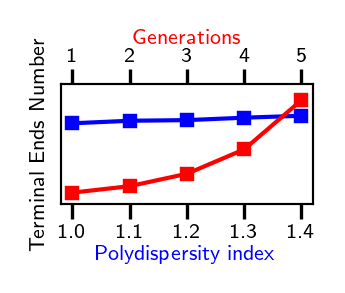

In [29]:
#FIGURE PARAMETERS
width = 1.
height = 0.8
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)



plt.rc('font', family='sans-serif', size=5)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.rc('axes', labelsize=5)
plt.rc('legend', fontsize=5,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
plt.rc('xtick.major', pad=1)  # Adjust horizontal tick label padding
plt.rc('ytick.major', pad=1)  # Adjust vertical tick label padding

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
# gs1=GridSpec(1,2,  left=0.12, bottom=0.6, right=.97, top=.94, wspace=0.3 )

gs2=GridSpec(1,1, left=0.11, bottom=0.25, right=.95, top=.75,wspace=0.8 )

a_pl=0.95
pl_cl=colors(a_pl)
pl_cl[2]=(0.7, 0.2, 0.1, a_pl)
pl_cl[3]=(0, 0, 0, a_pl)

a_cl=0.35
cl=colors(a_cl)
cl[2]=(0.7, 0.2, 0.1, a_cl)
cl[3]=(0, 0, 0, a_cl)

linstyl=['-','-',(0, (1, 1)),(0, (1, 1))] # - = 1d , -- = 2d , dotted=3d


cutoff=6.0 #cutoff for voume integral

lin_chain=84.0 #Linear solvophobic chain length
aver_chain=np.array([168.0,168.1,166.3,167.6,165.4,168.0,168.0,168.0,168.0,168.0,168.0])

#Left plot
# ax=plt.subplot(gs1[0,0])

dw_chosen=[1,1.1,1.2,1.3,1.4]
dw_show=np.array([1,1.2,1.4])
mult=1e0

tot_mic_vol=[]

#LHBC part
k=0
for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    phi1s=[]
    phi2s=[]
    for j in range(0,batches_num): #looping over batches

        batch=j+1
        fil=fileslhbc[(dws==dw_chosen[i]) & (batches==batch)][0]
        dat=np.loadtxt(fil,skiprows=0)
        distance=dat[:,0]
        phi1=dat[:,1]
        phi2=dat[:,2]
        phi1s.append(phi1)
        phi2s.append(phi2)
        
        
    phi1_mean=np.nanmean(np.array(phi1s),axis=0)
    phi1_std=np.nanstd(np.array(phi1s),axis=0)
    phi2_mean=np.nanmean(np.array(phi2s),axis=0)
    phi2_std=np.nanstd(np.array(phi2s),axis=0)

    phi1_mean=phi1_mean[distance>=-0.0000001]
    phi2_mean=phi2_mean[distance>=-0.0000001]
    phi1_std=phi1_std[distance>=-0.0000001]
    phi2_std=phi2_std[distance>=-0.0000001]   
    distance=distance[distance>=-0.0000001]
    
    tot_mic_vol.append(volume_integral(distance,phi1_mean,cutoff))
    lab="PDI = "+str(dw_chosen[i])

    if np.any(dw_show == dw_chosen[i]):
    #     ax.plot(distance,phi1_mean,linestyle=linstyl[0],c=pl_cl[k],label=lab)
    #     ax.plot(distance,phi2_mean,linestyle=linstyl[1],c=cl[k])
    #     ax.errorbar(distance,phi1_mean, phi1_std, fmt='none', capsize=1, elinewidth=1, capthick=1,c=pl_cl[k])
    #     ax.errorbar(distance,phi2_mean, phi2_std, fmt='none', capsize=1, elinewidth=1, capthick=1,c=cl[k])
        k+=1

        
#Linear part    
fil=fileslinear[0]
dat=np.loadtxt(fil,skiprows=0)
distance=dat[:,0]
phi1=dat[:,1]
phi2=dat[:,2]

phi1=phi1[distance>=-0.0000001]
phi2=phi2[distance>=-0.0000001]   
distance=distance[distance>=-0.0000001]

lab="Linear"
tot_mic_vol.append(volume_integral(distance,phi1,cutoff))

k=len(dw_show)
# ax.plot(distance,phi1,linestyle=linstyl[2],c=pl_cl[k],label=lab)
# ax.plot(distance,phi2,linestyle=linstyl[3],c=cl[k])    
    
        
    
#LDBC part
gen_chosen=[1,2,3,4,5]
gen_show=np.array([3,5])

k=len(dw_show)+1
for i in range(0,len(gen_chosen)):
    
    fil=filesldbc[(gens==gen_chosen[i]) ][0]
    dat=np.loadtxt(fil,skiprows=0)
    distance=dat[:,0]
    phi1=dat[:,1]
    phi2=dat[:,2]

    phi1=phi1[distance>=-0.0000001]
    phi2=phi2[distance>=-0.0000001]   
    distance=distance[distance>=-0.0000001]
    
    lab="Gen. = "+str(gen_chosen[i])
    tot_mic_vol.append(volume_integral(distance,phi1,cutoff))

    if np.any(gen_show == gen_chosen[i]):
        
        # ax.plot(distance,phi1,linestyle=linstyl[2],c=pl_cl[k],label=lab)
        # ax.plot(distance,phi2,linestyle=linstyl[3],c=cl[k])
        k+=1
    

    
    
  
    
# ax.set_xlabel(r'$\mathrm{Distance \, [\bar{R}_{g}]}$',labelpad=1.0)
# ax.set_ylabel(r"Volume fractions",labelpad=1.0)
# ax.set_xlim(0,5)


# ax.legend(frameon=False,loc='center',bbox_to_anchor=(0.75, 0.6),handlelength=0.5, ncol=1)







# dat_cr=[]



#Right plot
mult_ch=1e3
# ax=plt.subplot(gs1[0,1])
# mult=1e

tot_int=[]

#LHBC part
p=0
for i in range(0,len(dw_chosen)):  #looping over PDIs
    chain_ends_batch=[]  
    for j in range(0,batches_num_ends): #looping over batches
        batch=j+1
        chain_ends_per_mol=[]
        for k in range(0,mol_id_num): #looping over each molecule

            mol_id=k+1
#             print(str(dw_chosen[i])+" "+str(batch)+" "+str(mol_id)+" ")
            fil=fileslhbc_ends[(dws_ends==dw_chosen[i]) & (batches_ends==batch) & (mol_id_ends==mol_id)][0]
            dat=np.loadtxt(fil,skiprows=1)
#             if i==0 and j==0 and k==0:
            distance=dat[:,0]
            
            chain_end=dat[:,1]
            chain_ends_per_mol.append(chain_end)
            
            if len(chain_end) != 64:
            
                print("batch_"+ str(batch)+" mol id "+str(mol_id))
                print(len(chain_end))
            
            
        chain_ends_batch.append(np.sum(np.array(chain_ends_per_mol),axis=0))

        
    
    chain_ends_means=np.nanmean(np.array(chain_ends_batch),axis=0)
    chain_ends_stds=np.nanstd(np.array(chain_ends_batch),axis=0)
    

    lab="PDI = "+str(dw_chosen[i])+ "   "
    
    chain_ends_means=chain_ends_means[distance>=-0.0000001]
    chain_ends_stds=chain_ends_stds[distance>=-0.0000001]
    distance=distance[distance>=-0.0000001]

    tot_int.append(volume_integral(distance,chain_ends_means,cutoff))
    norm=volume_integral(distance,chain_ends_means,cutoff)
#     if i==0:
#         dat_cr.append(distance)

    if np.any(dw_show == dw_chosen[i]): 
#         dat_cr.append(chain_ends_means)
        # ax.plot(distance,chain_ends_means/norm*mult_ch,linestyle=linstyl[1],c=pl_cl[p])
        # ax.errorbar(distance,chain_ends_means/norm*mult_ch, chain_ends_stds/norm*mult_ch, fmt='none', capsize=1.5, elinewidth=1, capthick=1,c=pl_cl[p])
        p+=1


#Linear part    
fil=fileslinear_ends[0]
dat=np.loadtxt(fil,skiprows=1)
distance=dat[:,0]
chain_end=dat[:,1]

chain_end=chain_end[distance>=-0.0000001]
distance=distance[distance>=-0.0000001]
# dat_cr.append(chain_end)

lab="Linear"
tot_int.append(volume_integral(distance,chain_end,cutoff))
norm=volume_integral(distance,chain_end,cutoff)

k=len(dw_show)
# ax.legend(frameon=False,loc='center',bbox_to_anchor=(0.75, 0.65),handlelength=0.25, ncol=1)

# ax.plot(distance,chain_end/norm*mult_ch,linestyle=linstyl[3],c=pl_cl[k])
        
#LDBC part
k=len(dw_show)+1
for i in range(0,len(gen_chosen)):
    
    fil=filesldbc_ends[(gens==gen_chosen[i]) ][0]
    dat=np.loadtxt(fil,skiprows=1)
    distance=dat[:,0]
    chain_end=dat[:,1]

    chain_end=chain_end[distance>=-0.0000001]
    distance=distance[distance>=-0.0000001]

    lab="Gen = "+str(gen_chosen[i])+ "   "
    tot_int.append(volume_integral(distance,chain_end,cutoff))
    norm=volume_integral(distance,chain_end,cutoff)
    if np.any(gen_show == gen_chosen[i]): 
#         dat_cr.append(chain_end)

        # ax.plot(distance,chain_end/norm*mult_ch,linestyle=linstyl[3],c=pl_cl[k])
        k+=1

        
        
# ax.set_xlim(0,5)
# ax.set_xlabel(r'$\mathrm{Distance \, [\bar{R}_{g}]}$',labelpad=1.0)
# ax.set_ylabel(r"$\mathrm{c(r)\times10^{-3}}$",labelpad=1.0)
# indi_sort=np.argsort(dat_cr[0])
# for i in range(0,len(dat_cr)):
#     dat_cr[i]=dat_cr[i][indi_sort]
    
# np.savetxt('c_r.dat',np.array(dat_cr).T,header='1.Distance 2.PDI 1.0 3.PDI 1.2 4.PDI 1.4 5.Gen=0 6.Gen=2 7.Gen=4 8.Gen=5 ')



#Bottom plots


tot_int=np.array(tot_int)
tot_int=tot_int
tot_mic_vol=np.array(tot_mic_vol)

tot_int=tot_int/tot_int[len(dw_chosen)] #everything is normalised to the linear diblock
tot_mic_vol=tot_mic_vol/tot_mic_vol[len(dw_chosen)]

print("Average number of chain ends in each chain compared to linear")
print(tot_int/tot_mic_vol)




ax0=plt.subplot(gs2[0,0])

ax01=ax0.twiny()
# ax11=ax1.twinx()

genns=[0]+gen_chosen

# ax0.plot(dw_chosen,tot_int[0:len(dw_chosen)],linestyle='-',c='red',marker='s',markersize=1)
ax0.plot(dw_chosen,tot_int[0:len(dw_chosen)],linestyle='-',c='blue',marker='s',markersize=1)
# ax11.plot(genns[0],tot_mic_vol[len(dw_chosen)],linestyle='-',c='blue',marker='s',markersize=1)
ax01.plot(genns[1:],tot_int[len(dw_chosen)+1:],linestyle='-',c='red',marker='s',markersize=1)

# ax1.plot(genns,tot_int[len(dw_chosen):],marker='s',markersize=1,linestyle='-',c='red')
# ax11.plot(genns,tot_mic_vol[len(dw_chosen):],linestyle='-',c='blue',marker='s',markersize=1)

ax01.set_ylim(-1,25)
ax0.set_ylim(-1,25)

# ax01.set_ylabel(r"$\mathrm{n_M}$",c='blue',labelpad=1.0)
ax0.set_ylabel(r"Terminal Ends Number",labelpad=3.)
ax0.set_xticks([1.0,1.1,1.2,1.3,1.4]) 
ax01.set_xticks([1,2,3,4,5]) 


ax0.set_xlabel("Polydispersity index", c='blue',labelpad=0.8)
ax01.set_xlabel("Generations",c="red",labelpad=0.8)

for label in ax0.get_yticklabels():
    label.set_visible(False)
ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.set_yticks([])

plt.savefig("toc/chain_end_num.pdf")

In [19]:
print(tot_int[len(dw_chosen)+1:])

[ 1.46758197  2.86634194  5.55291774 10.84470099 21.50487135]
